# Airbnb Data Analysis

This notebook explores the cleaned and merged Airbnb dataset generated by the ETL pipeline.
We'll uncover insights about pricing, availability, and neighborhood trends.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
data_path = Path("../data/processed/airbnb_merged.csv")
df = pd.read_csv(data_path, low_memory=False)
print(df.shape)
df.head()

(13180517, 9)


,listing_id,date,available,id,name,neighbourhood_cleansed,room_type,price,review_count
0,40824219,2025-10-02,f,40824219,Room close to Manhattan for FEMALE guests,Sunnyside,Private room,$66.00,16.0
1,40824219,2025-10-03,f,40824219,Room close to Manhattan for FEMALE guests,Sunnyside,Private room,$66.00,16.0
2,40824219,2025-10-04,f,40824219,Room close to Manhattan for FEMALE guests,Sunnyside,Private room,$66.00,16.0
3,40824219,2025-10-05,f,40824219,Room close to Manhattan for FEMALE guests,Sunnyside,Private room,$66.00,16.0
4,40824219,2025-10-06,f,40824219,Room close to Manhattan for FEMALE guests,Sunnyside,Private room,$66.00,16.0


In Airbnb data, price is a string like $123.00, so we clean it

In [ ]:
df.info()
df.describe(include='all').T.head(10)

In [3]:
df["price"] = df["price"].replace('[\\$,]', '', regex=True).astype(float)

## EDA

Price distribution

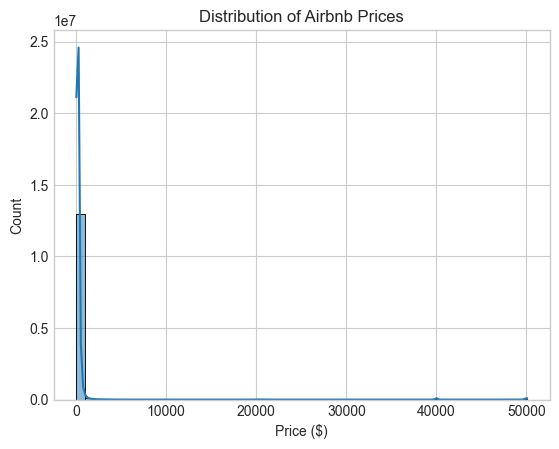

In [4]:
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price ($)")
plt.show()

Average price by neighborhood

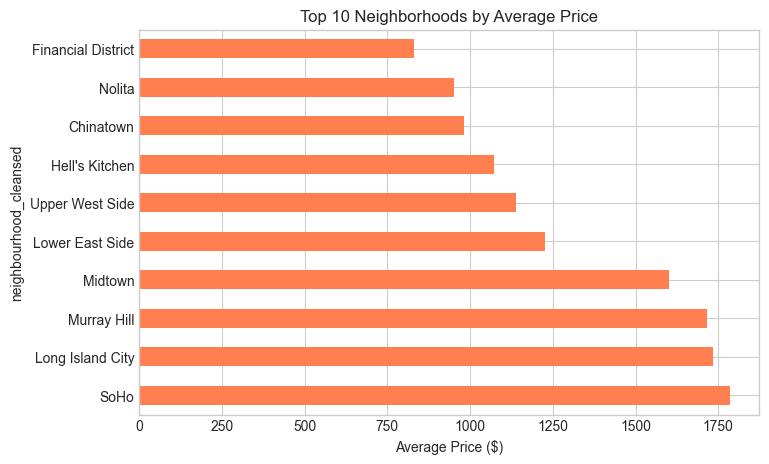

In [6]:
price_by_neigh = df.groupby("neighbourhood_cleansed")["price"].mean().sort_values(ascending=False)
price_by_neigh.head(10).plot(kind="barh", figsize=(8,5), color="coral")
plt.title("Top 10 Neighborhoods by Average Price")
plt.xlabel("Average Price ($)")
plt.show()

Room type distribution

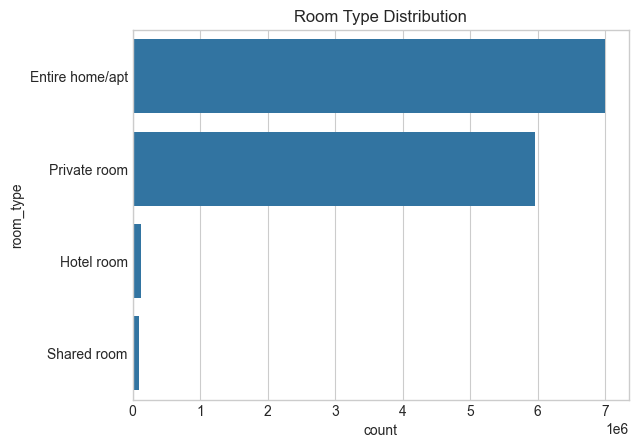

In [7]:
sns.countplot(y="room_type", data=df, order=df["room_type"].value_counts().index)
plt.title("Room Type Distribution")
plt.show()

Availability trends

In [ ]:
availability = df.groupby("date")["available"].apply(lambda x: (x=="t").mean())
availability.plot(figsize=(10,4), title="Average Availability Over Time")
plt.ylabel("Availability Rate")
plt.show()

Review volume vs price

In [ ]:
px.scatter(df, x="review_count", y="price", color="room_type",
           title="Review Volume vs Price by Room Type")